In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
pd.options.display.max_columns = 999
ML_data = pd.read_csv('ML_data.csv')

In [6]:
sns.set_theme()
sns.set_palette(sns.color_palette('Set1'))

In [5]:
MIC_ML_data = ML_data.dropna(subset = ['METHOD_MIC'])

# need code to clean up values > 1.6 - need to see if RF can use continuous data

MIC_strings = []

for i in MIC_ML_data['METHOD_MIC']:
    if i == '3.2':
        MIC_strings.append('>1.6')
    elif i == '6.4':
        MIC_strings.append('>1.6')
    elif i == '12.8':
        MIC_strings.append('>1.6')
    elif i == '>12.8':
        MIC_strings.append('>1.6')
    else:
        MIC_strings.append(i)
        
MIC_ML_data['MIC_values'] = MIC_strings

C:\Users\user\AppData\Local\Temp/ipykernel_4624/4025269328.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MIC_ML_data['MIC_values'] = MIC_strings


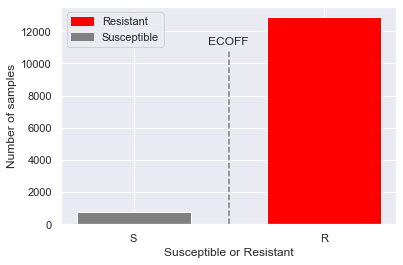

In [6]:
# bar chart showing number of samples for susceptible vs resistant
x_values, y_values = ['S','R'],[]
for i in [1,0]:
    if i == 1:
        y_values.append((ML_data['RESISTANCE'] == i).sum())
    else:
        y_values.append((ML_data['RESISTANCE'] == i).sum()) 
clrs = []
for i in x_values:
    if i == 'S':
        clrs.append('grey')
    else:
        clrs.append('red')
colors = {'Resistant':'red', 'Susceptible':'grey'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
plt.bar(x_values, y_values, color=clrs, width=.6)
plt.ylabel('Number of samples')
plt.xlabel('Susceptible or Resistant')
plt.axvline(x=0.5, ymax=0.8, color ='grey', label = 'ECOFF', linestyle ='--')
plt.text(0.5,11200,'ECOFF', horizontalalignment = 'center')
plt.show()

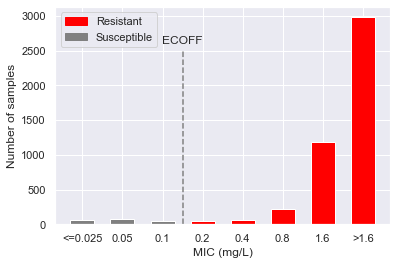

In [7]:
# bar chart showing number of samples for each MIC value
x_values, y_values = ['<=0.025','0.05','0.1','0.2','0.4','0.8','1.6','>1.6'],[]
for i in x_values:
    y_values.append((MIC_ML_data['MIC_values'] == i).sum())
clrs = []
for i in x_values:
    if i in ('<=0.025','0.05','0.1'):
        clrs.append('grey')
    else:
        clrs.append('red')
        
colors = {'Resistant':'red', 'Susceptible':'grey'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)        
plt.bar(x_values, y_values, color=clrs, width=.6)
plt.ylabel('Number of samples')
plt.xlabel('MIC (mg/L)')
plt.axvline(x=2.5, ymax=0.8, color ='grey', label = 'ECOFF', linestyle ='--')
plt.text(2.5,2600,'ECOFF', horizontalalignment = 'center')
plt.show()

Figures needed:
- Number of samples for each MIC (done)
- Number of samples for S vs R (done)
- Most frequently occuring mutations (done)
- Number of mutations for each MIC (done)
- Number of mutations for S vs R (done)
- Find a way of plotting all features to VMD:
    - e.g. map of mutations and there resistance, then map of features

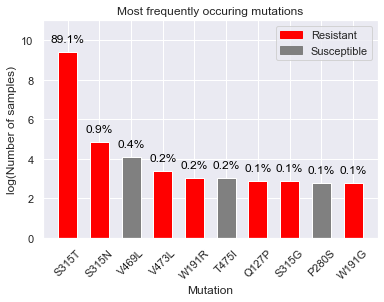

In [8]:
freq_mutations_df = (ML_data.MUTATION.value_counts()).head(10).to_frame()
x_values, y_values = [], []
for i in freq_mutations_df.index:
    x_values.append(i)
for i in freq_mutations_df.MUTATION:
    y_values.append(np.log(i))

unique_freq = ML_data.loc[ML_data['MUTATION'].isin(x_values)].drop_duplicates\
(subset='MUTATION', keep = 'first')
unique_freq.set_index('MUTATION', inplace = True)
RvsS = []
for i in x_values:
    RvsS.append(unique_freq.loc[i,'MUT_RESISTANCE'])
clrs = []
for i in RvsS:
    if i == 0:
        clrs.append('red')
    else:
        clrs.append('grey')
        
colors = {'Resistant':'red', 'Susceptible':'grey'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]

plt.bar(x_values, y_values, color=clrs, width=.6)
plt.title('Most frequently occuring mutations')
plt.legend(handles, labels)
plt.ylabel('log(Number of samples)')
plt.xlabel('Mutation')
plt.xticks(rotation = 45)
for i, v in enumerate(freq_mutations_df.MUTATION):
    percent = v/len(ML_data.MUTATION)
    percentage = "{:.1%}".format(percent)
    plt.text( i,np.log(v)+.5, str(percentage), color='black', ha='center')
plt.ylim(0, 11)
plt.show()

In [9]:
def remove_duplicate_mutations(data):
    
    data_unique = data.drop_duplicates(subset='MUTATION', keep = 'first')
    
    return (data_unique)

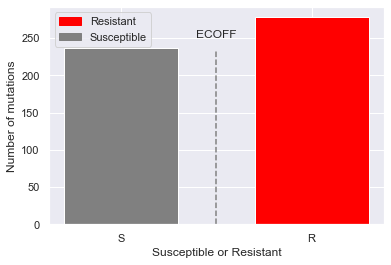

In [10]:
# bar chart showing number of mutations for susceptible vs resistant
unique_muts = remove_duplicate_mutations(ML_data)
x_values, y_values = ['S','R'],[]
for i in [1,0]:
    if i == 1:
        y_values.append((unique_muts['RESISTANCE'] == i).sum())
    else:
        y_values.append((unique_muts['RESISTANCE'] == i).sum()) 
clrs = []
for i in x_values:
    if i == 'S':
        clrs.append('grey')
    else:
        clrs.append('red')
        
colors = {'Resistant':'red', 'Susceptible':'grey'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)        
plt.bar(x_values, y_values, color=clrs, width=.6)
plt.ylabel('Number of mutations')
plt.xlabel('Susceptible or Resistant')
plt.axvline(x=0.5, ymax=0.8, color ='grey', label = 'ECOFF', linestyle ='--')
plt.text(0.5,250,'ECOFF', horizontalalignment = 'center')
plt.show()

In [11]:
def remove_duplicate_mutations_MIC(data1):

    #converts MIC_values to an integer so that the mean can be calculated for each mutation
    #with multiple samples
    data = data1.copy()
    MIC_integers = []

    for i in data['MIC_values']:
        if i == '<=0.025':
            MIC_integers.append(1)
        elif i == '0.05':
            MIC_integers.append(2)
        elif i == '0.1':
            MIC_integers.append(3)
        elif i == '0.2':
            MIC_integers.append(4)
        elif i == '0.4':
            MIC_integers.append(5)
        elif i == '0.8':
            MIC_integers.append(6)
        elif i == '1.6':
            MIC_integers.append(7)
        elif i == '>1.6':
            MIC_integers.append(8)
        
    data['MIC_integers'] = MIC_integers

    #calculates the mean MIC value using the integer scale for each mutation
    MIC_calc_df = data[['MUTATION','MIC_integers']].groupby('MUTATION').mean()
    
    #rounds the mean MIC value to the nearest integer for conversion back to the 
    #original MIC classes
    MIC_rounded = []
    for i in MIC_calc_df['MIC_integers']:
        rnd = round(i)
        MIC_rounded.append(rnd)
    MIC_calc_df['MIC_rounded'] = MIC_rounded
    
    #converts integers back to orignal MIC classes
    MIC_strings = []
    for i in MIC_calc_df['MIC_rounded']:
        if i == 1:
            MIC_strings.append('<=0.025')
        elif i == 2:
            MIC_strings.append('0.05')
        elif i == 3:
            MIC_strings.append('0.1')
        elif i == 4:
            MIC_strings.append('0.2')
        elif i == 5:
            MIC_strings.append('0.4')
        elif i == 6:
            MIC_strings.append('0.8')
        elif i == 7:
            MIC_strings.append('1.6')
        elif i == 8:
            MIC_strings.append('>1.6')   

    MIC_calc_df['MIC_final'] = MIC_strings

    # joins new MIC classes to CV_train df to replace the variation in MIC values associated
    # with mutations with multiple DST_measurements 
    MIC_calc_df.drop(['MIC_integers','MIC_rounded'], axis =1, inplace = True)
    data.set_index('MUTATION', inplace = True)
    data = data.join(MIC_calc_df)
    data.reset_index(inplace = True)
    data.drop(['MIC_values','MIC_integers'], axis = 1, inplace = True)
    data.rename(columns = {'index':'MUTATION','MIC_final':'MIC_values'}, inplace = True)
    
    #removes duplicates and mutation column
    data_unique = data.drop_duplicates(subset='MUTATION', keep = 'first')
    
    return (data_unique)

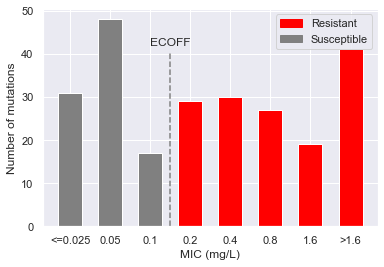

In [12]:
unique_MIC_muts = remove_duplicate_mutations_MIC(MIC_ML_data)

# bar chart showing number of samples for each MIC value
x_values, y_values = ['<=0.025','0.05','0.1','0.2','0.4','0.8','1.6','>1.6'],[]
for i in x_values:
    y_values.append((unique_MIC_muts['MIC_values'] == i).sum())
clrs = []
for i in x_values:
    if i in ('<=0.025','0.05','0.1'):
        clrs.append('grey')
    else:
        clrs.append('red')
        
        colors = {'Resistant':'red', 'Susceptible':'grey'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)

plt.bar(x_values, y_values, color=clrs, width=.6)
plt.ylabel('Number of mutations')
plt.xlabel('MIC (mg/L)')
plt.axvline(x=2.5, ymax=0.8, color ='grey', label = 'ECOFF', linestyle ='--')
plt.text(2.5,42,'ECOFF', horizontalalignment = 'center')
plt.show()

Model comparison

Comparison of feature importance for best parameters and direct binary classification

In [7]:
LR_relative_importance = pd.read_csv('LR_relative_importance.csv')
LSVC_relative_importance = pd.read_csv('LSVC_relative_importance.csv')
DT_relative_importance = pd.read_csv('DT_relative_importance.csv')
RF_relative_importance = pd.read_csv('RF_relative_importance.csv')

LR_relative_importance.drop(LR_relative_importance.columns[0], axis = 1, inplace = True )
LSVC_relative_importance.drop(LSVC_relative_importance.columns[0], axis = 1, inplace = True )
DT_relative_importance.drop(DT_relative_importance.columns[0], axis = 1, inplace = True )
RF_relative_importance.drop(RF_relative_importance.columns[0], axis = 1, inplace = True )

In [8]:
dfs = [LR_relative_importance,LSVC_relative_importance,DT_relative_importance,RF_relative_importance]
import functools as ft
df_final = ft.reduce(lambda left, right: pd.merge(left, right, on='n_features'), dfs)

In [9]:
df_melted = df_final.melt("n_features",var_name="Params",value_name="importance")

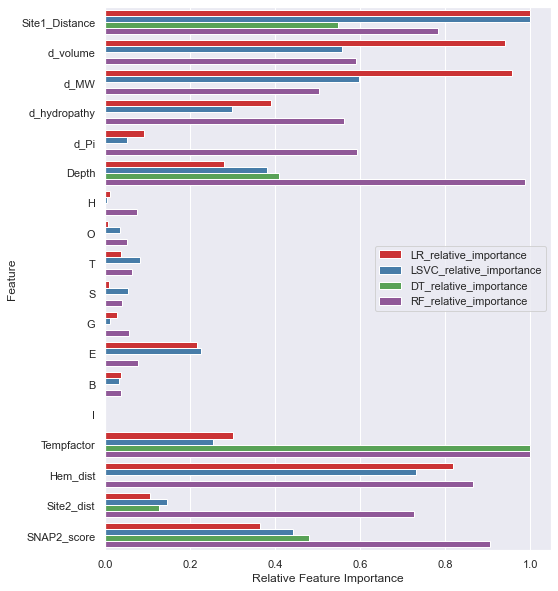

In [10]:
sns.set_theme()
sns.set(rc={'figure.figsize':(8,10)})
sns.set_palette(sns.color_palette('Set1'))
x = sns.barplot(data=df_melted, x='importance', y='n_features', hue='Params', orient='h')
feature_names = ['Site1_Distance','d_volume','d_MW',	\
              'd_hydropathy', 'd_Pi', 'Depth','H','O','T','S','G','E',  \
              'B','I','Tempfactor','Hem_dist','Site2_dist','SNAP2_score']
plt.yticks(LR_relative_importance['n_features'], feature_names)
x.set(xlabel='Relative Feature Importance', ylabel='Feature')
plt.legend()

Sum relative feature importance to see most dominant features across all models

In [11]:
#etermine sum of relative importances across 4 direct classification models
sum_relative_importance = []
for i in df_final['n_features']:
    total = df_final.iloc[i,0] + df_final.iloc[i,2] + df_final.iloc[i,3] + df_final.iloc[i,4]
    sum_relative_importance.append(total)

DF_ri = pd.DataFrame({'Relative_importance_sum':sum_relative_importance,
                   'n_features': df_final['n_features'] })

No handles with labels found to put in legend.


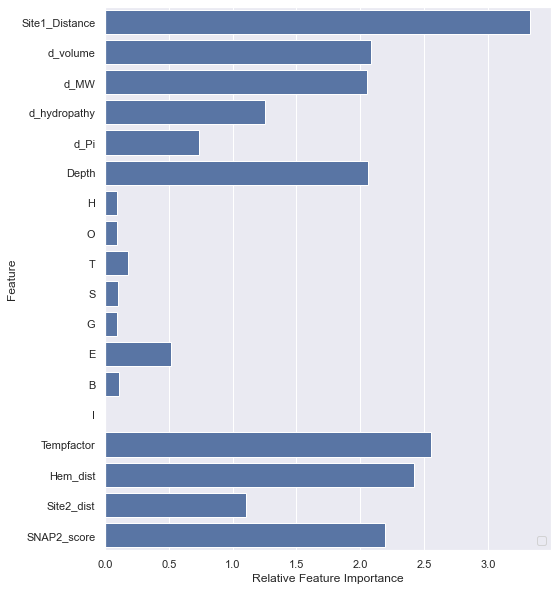

In [12]:
sns.set_theme()
sns.set(rc={'figure.figsize':(8,10)})
x = sns.barplot(data=DF_ri, x='Relative_importance_sum', y='n_features', orient='h', color = 'C0')
feature_names = ['Site1_Distance','d_volume','d_MW',	\
              'd_hydropathy', 'd_Pi', 'Depth','H','O','T','S','G','E',  \
              'B','I','Tempfactor','Hem_dist','Site2_dist','SNAP2_score']
plt.yticks(LR_relative_importance['n_features'], feature_names)
x.set(xlabel='Relative Feature Importance', ylabel='Feature')
plt.legend(loc='lower right')

Comparison of very major error and major error for each model

1. Get dataframes with error data for direct and indirect models

In [13]:
LR_quality = pd.read_csv('LR_quality.csv')
LSVC_quality = pd.read_csv('LSVC_quality.csv')
DT_quality = pd.read_csv('DT_quality.csv')
RF_quality = pd.read_csv('RF_quality.csv')
ORD_quality = pd.read_csv('ORD_quality.csv')

LR_quality.drop(LR_quality.columns[0], axis = 1, inplace = True )
LSVC_quality.drop(LSVC_quality.columns[0], axis = 1, inplace = True )
DT_quality.drop(DT_quality.columns[0], axis = 1, inplace = True )
RF_quality.drop(RF_quality.columns[0], axis = 1, inplace = True )
ORD_quality.drop(ORD_quality.columns[0], axis = 1, inplace = True )

In [14]:
# dataframe containing very major and major error values for each 
# direct model and with shifted threshold
direct_model_quality = (pd.concat([LR_quality,LSVC_quality,DT_quality,RF_quality], axis = 1)).head(4)

In [15]:
# dataframe containing very major and major error values for each 
# indirect model and with shifted threshold
ORD_IT_quality = ORD_quality[:2]
ORD_IT_quality.rename(columns = {'ORD_quality':'ORD_IT_quality'}, inplace = True)
ORD_IT_quality.reset_index(inplace=True)
ORD_IT_quality.drop(ORD_IT_quality.columns[0], axis = 1, inplace = True )

ORD_AT_quality = ORD_quality[2:]
ORD_AT_quality.rename(columns = {'ORD_quality':'ORD_AT_quality'}, inplace = True)
ORD_AT_quality.reset_index(inplace=True)
ORD_AT_quality.drop(ORD_AT_quality.columns[0], axis = 1, inplace = True )

indirect_f4 = (pd.concat([LR_quality,LSVC_quality,DT_quality,RF_quality], axis = 1)).tail(2)
indirect_f4.reset_index(inplace=True)
indirect_f4.drop(indirect_f4.columns[0], axis = 1, inplace = True )

indirect_model_quality = pd.concat([indirect_f4,ORD_IT_quality,ORD_AT_quality], axis = 1)

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


2. Direct model figure:

In [16]:
binary_df = pd.DataFrame({'Model':['Logistic Regression','Linear SVC','Decision Tree','Random Forest'],\
                          'Very Major Error':[direct_model_quality.iloc[0,0],direct_model_quality.iloc[0,1],\
                                              direct_model_quality.iloc[0,2],direct_model_quality.iloc[0,3]],\
                          'Major Error':[direct_model_quality.iloc[1,0],direct_model_quality.iloc[1,1],\
                                              direct_model_quality.iloc[1,2],direct_model_quality.iloc[1,3]],\
                          'Shifted Very Major Error':[direct_model_quality.iloc[2,0],direct_model_quality.iloc[2,1],\
                                              direct_model_quality.iloc[2,2],direct_model_quality.iloc[2,3]],\
                          'Shifted Major Error':[direct_model_quality.iloc[3,0],direct_model_quality.iloc[3,1],\
                                              direct_model_quality.iloc[3,2],direct_model_quality.iloc[3,3]]})

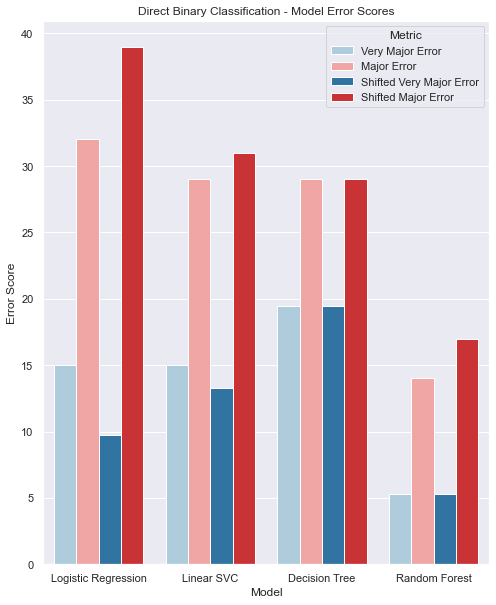

In [22]:
tidy = binary_df.melt(id_vars='Model', var_name='Metric', value_name='Percentage')
sns.set_palette(sns.color_palette('Paired'))
sns.barplot(data=tidy, x='Model', y='Percentage', hue='Metric', palette = ['C0','C4','C1','C5'])
plt.ylabel('Error Score')
plt.title('Direct Binary Classification - Model Error Scores')
plt.show()

3. Indirect model figure:

In [23]:
multiclass_binary_df = pd.DataFrame({'Model':['Logistic Regression','Linear SVC','Decision Tree','Random Forest',\
                                  'IT Ordinal Regression','AT Ordinal Regression'],\
                          'Very Major Error':[indirect_model_quality.iloc[0,0],indirect_model_quality.iloc[0,1],\
                                              indirect_model_quality.iloc[0,2],indirect_model_quality.iloc[0,3],\
                          indirect_model_quality.iloc[0,4],indirect_model_quality.iloc[0,5]],\
                          'Major Error':[indirect_model_quality.iloc[1,0],indirect_model_quality.iloc[1,1],\
                                              indirect_model_quality.iloc[1,2],indirect_model_quality.iloc[1,3],\
                          indirect_model_quality.iloc[1,4],indirect_model_quality.iloc[1,5]]})

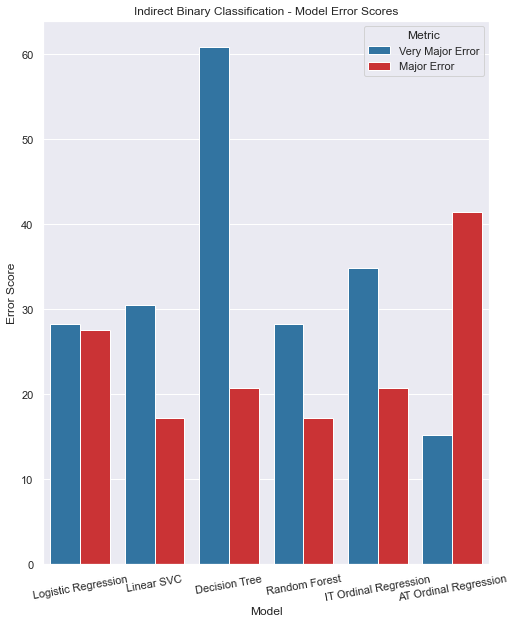

In [25]:
tidy = multiclass_binary_df.melt(id_vars='Model', var_name='Metric', value_name='Percentage')
sns.barplot(data=tidy, x='Model', y='Percentage', hue='Metric',palette = ['C1','C5'])
plt.ylabel('Error Score')
plt.title('Indirect Binary Classification - Model Error Scores')
plt.xticks(rotation = 10)
plt.show()